In [ ]:
import pandas as pd

df=pd.read_csv('diabetes.csv')

In [ ]:
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cor=df.corr()
cor_tar = cor["Outcome"].sort_values(ascending=False)
cor_tar

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

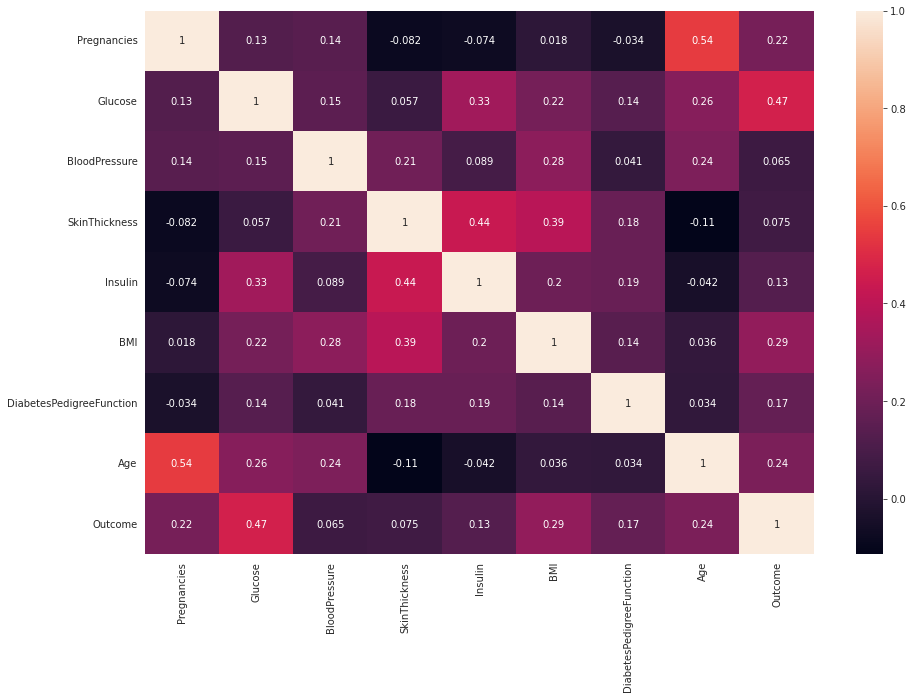

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor, 
        xticklabels=cor.columns,
        yticklabels=cor.columns,annot=True,ax=ax)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



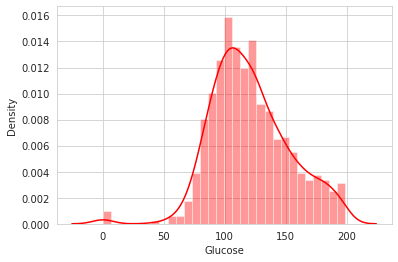

In [ ]:
sns.set_style('whitegrid')
sns.distplot(df['Glucose'], color ='red', bins = 30)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



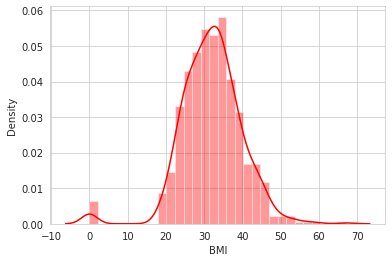

In [ ]:
sns.distplot(df['BMI'], color ='red', bins = 30)

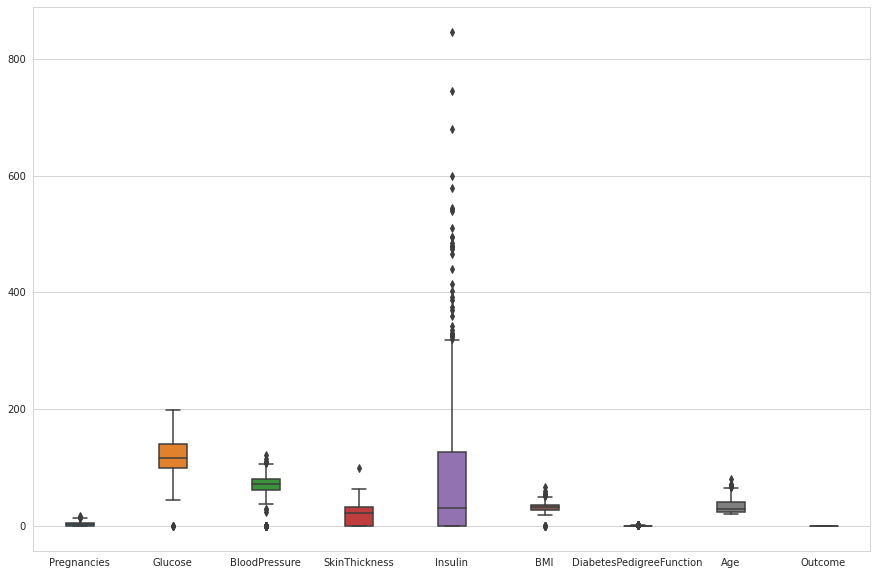

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df,width=0.3,ax=ax)

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="Glucose", y="Outcome")
fig.show()

In [ ]:
y=df['Outcome']
X=df.drop('Outcome',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
lr.score(X_test,y_test)

NameError: ignored

In [ ]:
X_train_wo_ins = X_train.drop('Insulin',axis=1)
X_test_wo_ins = X_test.drop('Insulin',axis=1)

In [ ]:
lr.fit(X_train_wo_ins,y_train)
lr.score(X_test_wo_ins,y_test)

0.7401574803149606

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[1,2,3,4,5]}
gcv = GridSearchCV(lr,param_grid)
gcv.fit(X_train,y_train)


GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1, 2, 3, 4, 5]})

In [ ]:
gcv.best_params_

{'C': 1}

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()
X=scale.fit_transform(X)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [ ]:
lr.score(X_test,y_test)

0.7480314960629921